### Data-driven prediction of energy use of appliances 
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. 

Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes(parameters). 



### Problem Statement
1. Analyze the weather condition for the region and mention seasons with months.
2. Analyze the energy consumption w.r.t. humidity, temp., pressure, visibility one by one.
3. How much power supply will be needed for different phase of a normal day?
4. Which days of week will require more power supply?
5. How can electricity be saved by using optimal number of appliance and lights?

# Step 1: Importing modules and dataset

In [ ]:
# Data visualization and analysis modules
import pandas as pd
pd.set_option("display.max_columns", None)  # Display all columns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Appliance energy dataset
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Appliance Energy Prediction/KAG_energydata_complete.csv')

In [4]:
# Notes on the dataframe columns
'''date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH1, Humidity in kitchen area, in % 
T2, Temperature in living room area, in Celsius 
RH2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH3, Humidity in laundry room area, in % 
T4, Temperature in office room, in Celsius 
RH4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH5, Humidity in bathroom, in % 
T6, Temperature outside the building (north side), in Celsius 
RH6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH7, Humidity in ironing room, in % 
T8, Temperature in teenager room 2, in Celsius 
RH8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH9, Humidity in parents room, in % 
To, Temperature outside (from Chievres weather station), in Celsius 
Pressure (from Chievres weather station), in mm Hg 
RHout, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station 
(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, 
rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months 
of weather data'''
print('Dataset Overview')
df1.head() 

Dataset Overview


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Step 2: Understanding the dataset

In [5]:
df1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [6]:
# Renaming the short form column names to the long form 
df_final = df1.rename(columns={'date':'DateTime','T1':'Kitchen_temp', 'RH_1':'Kitchen_humidity', 'T2':'Liv_room_temp', 'RH_2':'Liv_room_humidity', 'T3':'Laundary_room_temp.',
       'RH_3':'Laundary_room_humidity', 'T4':'Office_room_temp', 'RH_4':'Office_room_humd', 'T5':'bathroom_temp', 'RH_5':'bathroom_humd', 'T6':'Outside_build_temp', 'RH_6':'Outside_build_humd', 'T7':'iron_room_temp', 'RH_7':'iron_room_humd', 'T8':'teen_room_temp',
       'RH_8':'teen_room_humd', 'T9':'parent_room_temp', 'RH_9':'parent_room_humd'})

In [7]:
df_final.head()

,DateTime,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
df_final.tail()

,DateTime,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [9]:
df_final.isnull().sum().sum()   # there is no null value

0

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                19735 non-null  object 
 1   Appliances              19735 non-null  int64  
 2   lights                  19735 non-null  int64  
 3   Kitchen_temp            19735 non-null  float64
 4   Kitchen_humidity        19735 non-null  float64
 5   Liv_room_temp           19735 non-null  float64
 6   Liv_room_humidity       19735 non-null  float64
 7   Laundary_room_temp.     19735 non-null  float64
 8   Laundary_room_humidity  19735 non-null  float64
 9   Office_room_temp        19735 non-null  float64
 10  Office_room_humd        19735 non-null  float64
 11  bathroom_temp           19735 non-null  float64
 12  bathroom_humd           19735 non-null  float64
 13  Outside_build_temp      19735 non-null  float64
 14  Outside_build_humd      19735 non-null

In [11]:
df_final.describe()

,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Conlcusion on the dataset:
1. There is one object(string) column, 28 numerical columns and no categorial columns.
2. There is no null value in the dataset.
3. There are 2 dependent columns(appliances and lights), and all other are independent columns.
4. Basically we are provided with 5 physical quantities: temp., pressure, windspeed, humidity and visibility.
5. Each row of the dataset tells how many appliances and lights are in use as per the variation of the physical quantities for a housing colony in 5 months cycle.
6. Indoor temp. range: 15 to 29 degree celsius \
   Outdoor temp. range: -5 to 28 degree celsius \
   Appliance energy range: 10 to 1080 Wh \
   Lights energy range: 0 to 70 Wh \
   Indoor humidity range: 20% to 96% \ 
   Outdoor humidity range: 1% to 99.9% \
   Pressure: 729 to 772 mm of HG 
   

# Step 3: Data Extraction and Cleaning

In [12]:
# Let's first drop light column
df_final.drop(['lights'], axis=1, inplace=True)

# Convert datetime string into datetime format
df_final['DateTime'] = pd.to_datetime(df_final['DateTime'])
df_final['Date'] = df_final['DateTime'].dt.date

# Adding more precised datetime columns
df_final['month'] = df_final['DateTime'].dt.month
df_final['weekday'] = df_final['DateTime'].dt.weekday
df_final['time'] = df_final['DateTime'].dt.time
df_final['hour'] = df_final['DateTime'].dt.hour

In [13]:
df_final['time'] = df_final['time'].astype(str)
df_final['DateTime'] = df_final['DateTime'].astype(str)
df_final['Date'] = df_final['Date'].astype(str)


In [14]:
# Removing less important columns
df_final.drop(['DateTime','rv1','rv2'], axis=1, inplace=True)

In [15]:
df_final.columns

Index(['Appliances', 'Kitchen_temp', 'Kitchen_humidity', 'Liv_room_temp',
       'Liv_room_humidity', 'Laundary_room_temp.', 'Laundary_room_humidity',
       'Office_room_temp', 'Office_room_humd', 'bathroom_temp',
       'bathroom_humd', 'Outside_build_temp', 'Outside_build_humd',
       'iron_room_temp', 'iron_room_humd', 'teen_room_temp', 'teen_room_humd',
       'parent_room_temp', 'parent_room_humd', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Date', 'month',
       'weekday', 'time', 'hour'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


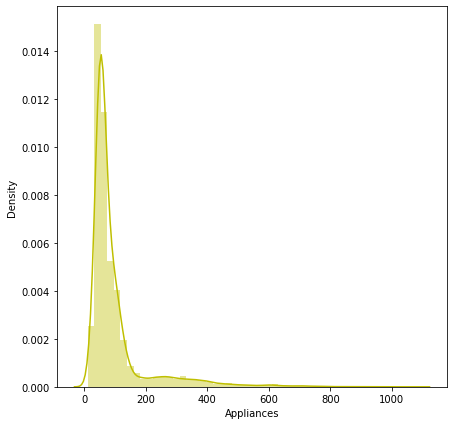

In [16]:
# Dependent variable 'Appliances(Wh)' - Frequency
plt.figure(figsize=(7,7))
sns.distplot(df_final['Appliances'],color="y")

Conclusion:
1. For most of the days appliance energy range was 0 to 50 Wh.
2. The high energy use is occasional.

### Deciding important columns

In [17]:
# Correlation table
df_corr = df_final.corr()
df_corr

,Appliances,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,weekday,hour
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011606,0.003060,0.216792
Kitchen_temp,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,0.706305,0.001381,0.178858
Kitchen_humidity,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.094048,-0.053782,0.018594
Liv_room_temp,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,0.533479,0.000602,0.254784
Liv_room_humidity,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,-0.097914,-0.044249,-0.183322
Laundary_room_temp.,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,0.790365,-0.017514,0.037624
Laundary_room_humidity,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.414359,-0.035182,-0.052392
Office_room_temp,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,0.789168,-0.091006,0.088407
Office_room_humd,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.258167,-0.005749,-0.019068
bathroom_temp,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,0.785865,-0.040827,0.071340


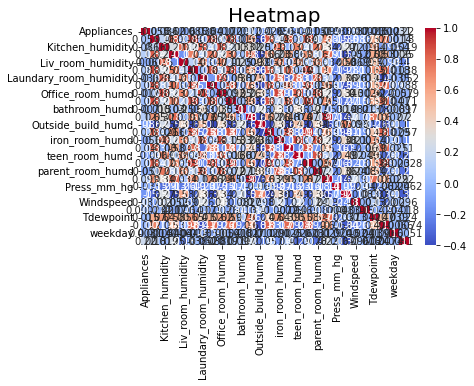

In [18]:
sns.heatmap(df_final.corr(), vmin=-0.4, cmap='coolwarm', annot=True)
plt.title('Heatmap', fontsize=20)
plt.rcParams['figure.figsize'] = (20, 15)
plt.show()

In [19]:
imp = df_corr[0:1]
imp

,Appliances,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,bathroom_temp,bathroom_humd,Outside_build_temp,Outside_build_humd,iron_room_temp,iron_room_humd,teen_room_temp,teen_room_humd,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,month,weekday,hour
Appliances,1.0,0.055447,0.086031,0.120073,-0.060465,0.08506,0.036292,0.040281,0.016965,0.01976,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.01001,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.00023,0.015353,-0.011606,0.00306,0.216792


In [20]:
imp = df_corr[0:1]
col_value = []
for col in imp.iloc[0,:]:
    col_value.append(col)
pos_values = []
for val in col_value:
    if val>=0.04 and val<=1:
        pos_values.append(val)
pos_values
neg_values = []
for val2 in col_value:
    if val2<0 and val2<=(-0.05):
        neg_values.append(val2)
print(pos_values)
print(neg_values)

[1.0, 0.05544747185203501, 0.08603142531155053, 0.12007328289803465, 0.08505990236568402, 0.040280983010929486, 0.11763768942238377, 0.0991546507399615, 0.08712210591235872, 0.2167915884902386]
[-0.060464760027120014, -0.08317760704200591, -0.05564241833633239, -0.09403862707399029, -0.05146201134630302, -0.15228238090915153]


In [21]:
# important columns
pos_col = []
for col in imp.columns:
    if imp.loc[:,[col]].iat[0,0] in pos_values:
        pos_col.append(col)
   
neg_col = []
for col in imp.columns:
    if imp.loc[:,[col]].iat[0,0] in neg_values:
        neg_col.append(col)

final_imp_col = pos_col + neg_col
final_imp_col

['Appliances',
 'Kitchen_temp',
 'Kitchen_humidity',
 'Liv_room_temp',
 'Laundary_room_temp.',
 'Office_room_temp',
 'Outside_build_temp',
 'T_out',
 'Windspeed',
 'hour',
 'Liv_room_humidity',
 'Outside_build_humd',
 'iron_room_humd',
 'teen_room_humd',
 'parent_room_humd',
 'RH_out']

In [22]:
df_final2 = df_final.loc[:,final_imp_col]

In [23]:
# Extracting essential columns
col_list = []
for e in list(df_final2.columns):
    col_list.append(e)
list2 = ['Appliances']
for e in list2:
    col_list.remove(e)    
print(col_list)

['Kitchen_temp', 'Kitchen_humidity', 'Liv_room_temp', 'Laundary_room_temp.', 'Office_room_temp', 'Outside_build_temp', 'T_out', 'Windspeed', 'hour', 'Liv_room_humidity', 'Outside_build_humd', 'iron_room_humd', 'teen_room_humd', 'parent_room_humd', 'RH_out']


In [24]:
temp_col = [elem for elem in col_list if 'temp' in elem]
temp_col.append('T_out')
temp_col

['Kitchen_temp',
 'Liv_room_temp',
 'Laundary_room_temp.',
 'Office_room_temp',
 'Outside_build_temp',
 'T_out']

In [25]:
humidity_col = [elem for elem in col_list if 'humidity' in elem]
humidity_col1 = [elem for elem in col_list if 'humd' in elem]
humidity_col+=humidity_col1
humidity_col.append('RH_out')
humidity_col

['Kitchen_humidity',
 'Liv_room_humidity',
 'Outside_build_humd',
 'iron_room_humd',
 'teen_room_humd',
 'parent_room_humd',
 'RH_out']

In [26]:
other_phy_features = ['Windspeed', 'Visibility','Tdewpoint']
temporal_features = ['Date', 'month','weekday', 'time', 'hour']

### All features: 
1. Independent Features: \
   temp_col \
   humidity_col \
   other_phy_features \
   temporal_features 
2. Dependent Feature: 'Appliances'

#### Histogram for independent variables

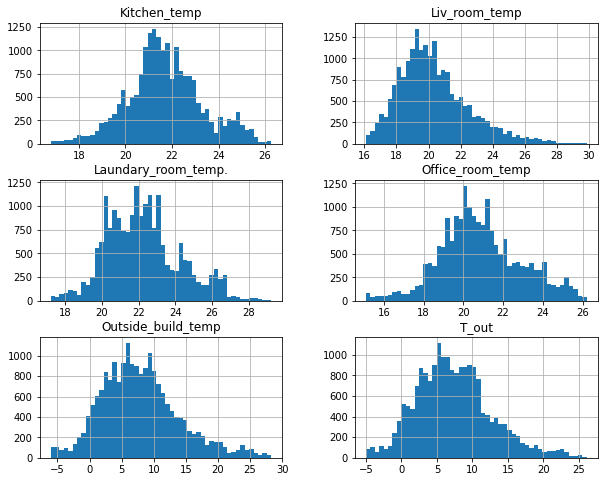

In [27]:
# Temperature variables
df_final2[temp_col].hist(bins=50, figsize=(10,8));

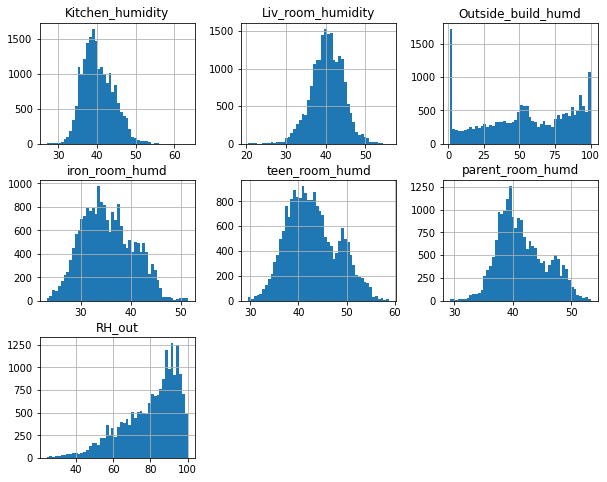

In [28]:
# Humidity variables
df_final2[humidity_col].hist(bins=50, figsize=(10,8));

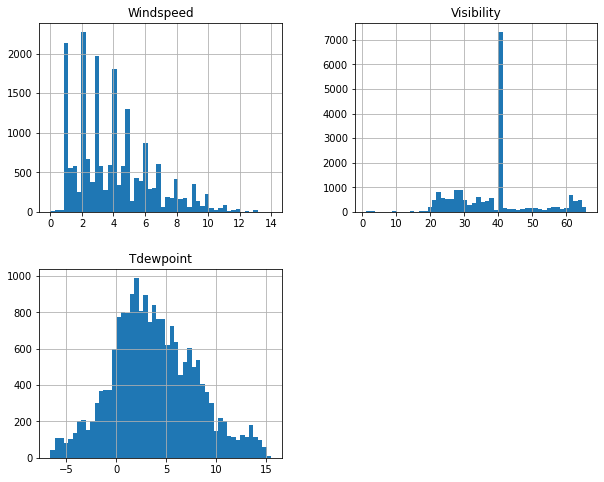

In [29]:
# Other Physical Features
df_final[other_phy_features].hist(bins=50, figsize=(10,8));

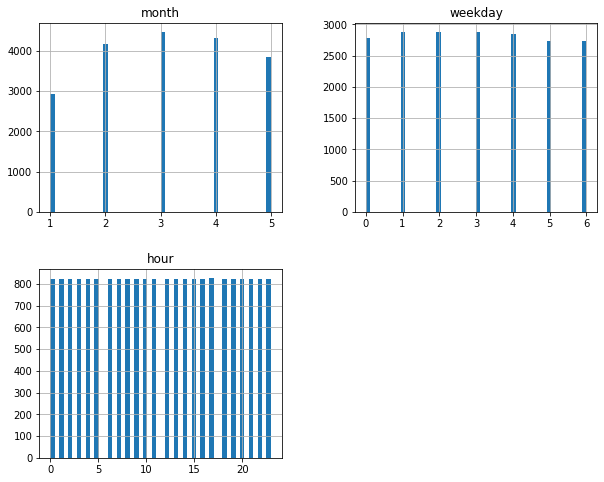

In [30]:
# Temporal Features
df_final[temporal_features].hist(bins=50, figsize=(10,8));

### Appliance use with temperature variation

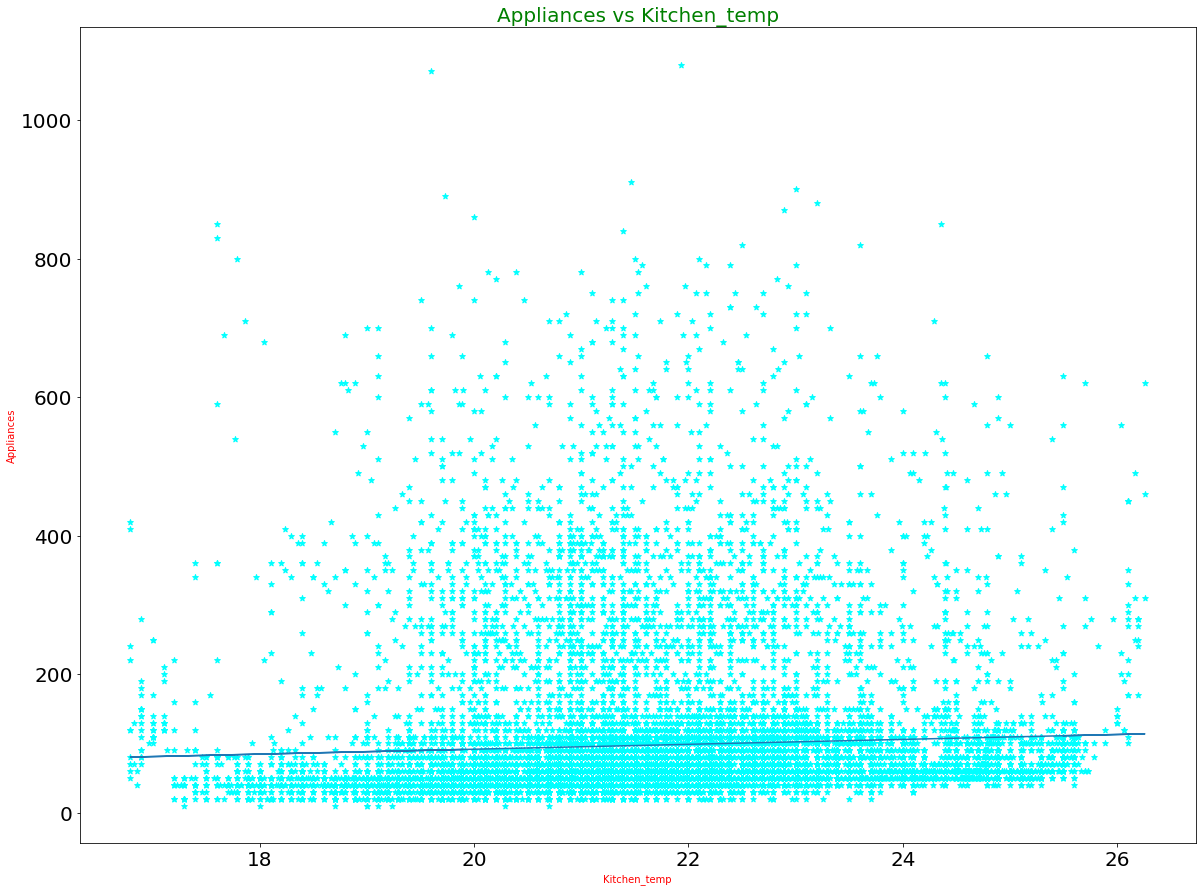

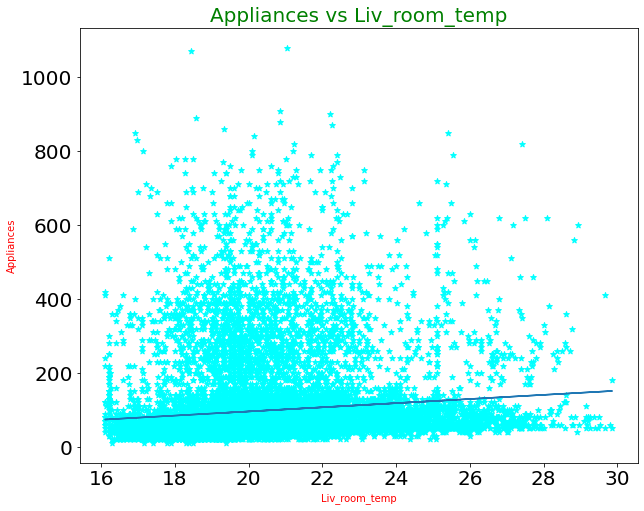

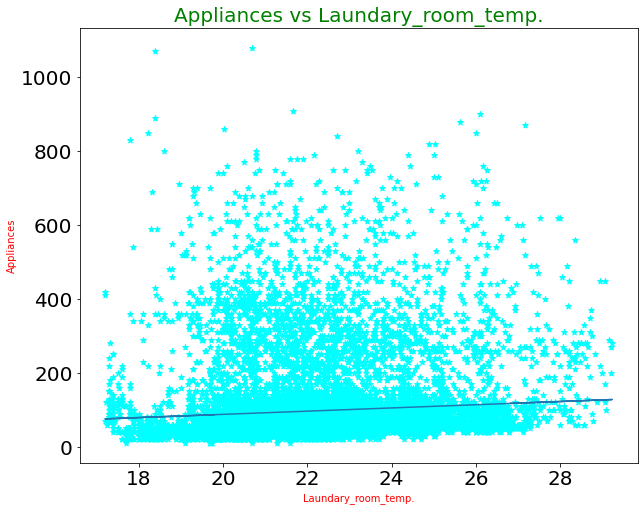

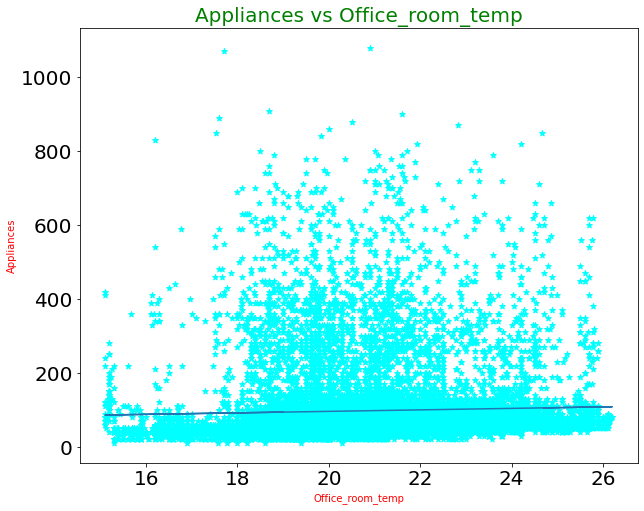

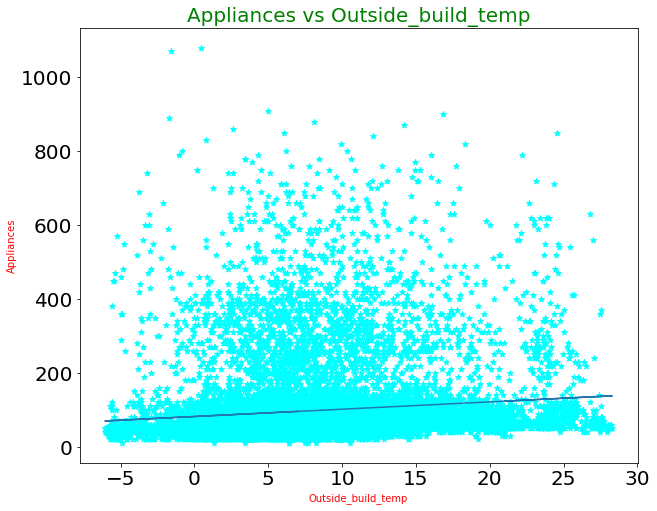

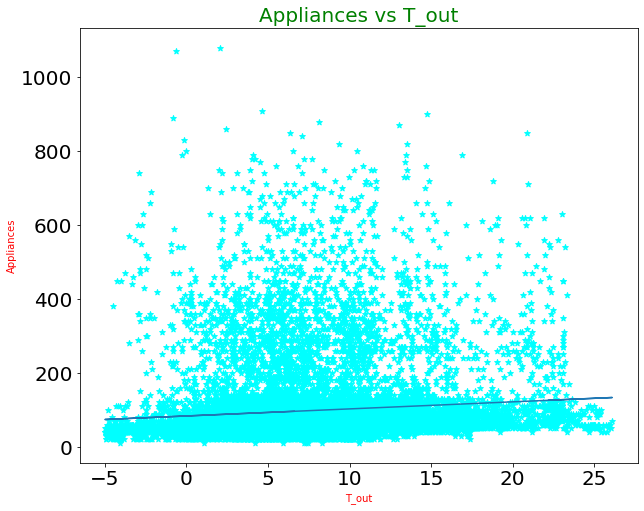

In [31]:
### Visualizing the dependent and independent variables(temperature) with linear model tools
from sklearn import linear_model
for elem in temp_col:
    y = df_final2['Appliances']
    reg = linear_model.LinearRegression()
    reg.fit(df_final2[[elem]],y)
    plt.title(f'Appliances vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Appliances', color='red')
    plt.scatter(df_final2[elem],y, color='cyan', marker='*')
    plt.plot(df_final2[elem], reg.predict(df_final2[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

### Appliance use with humidity

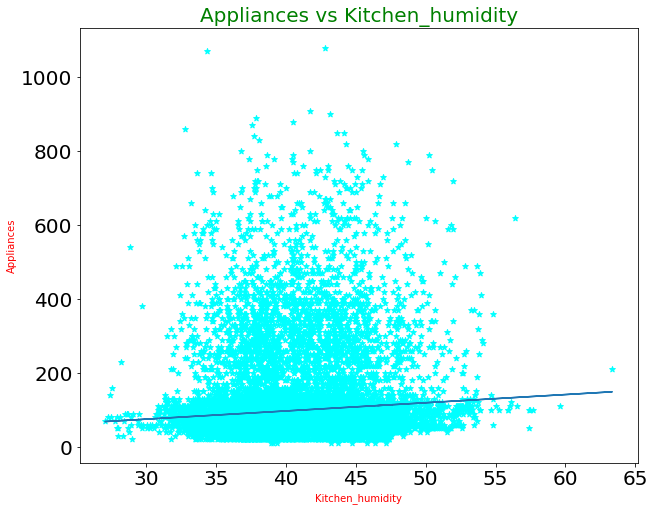

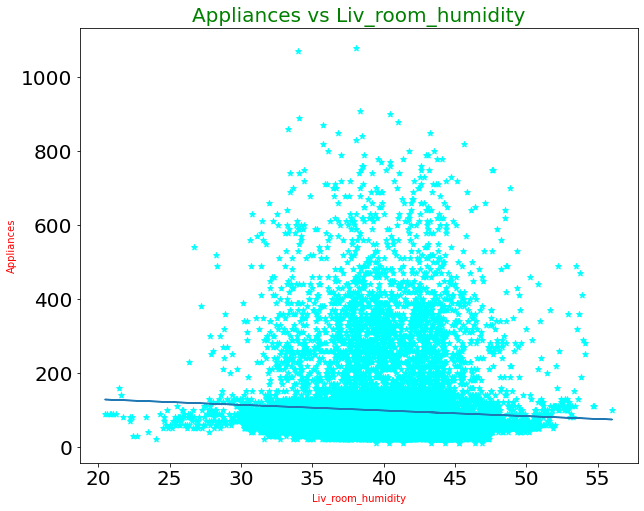

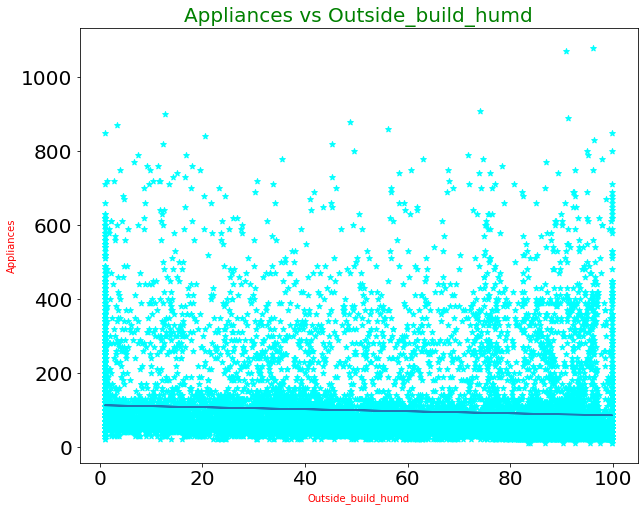

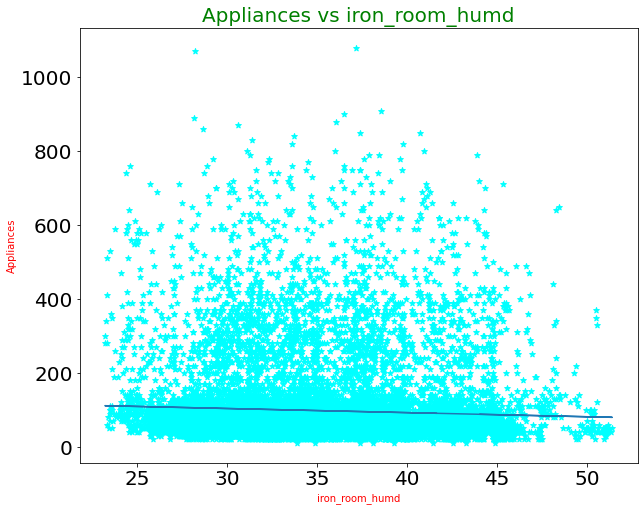

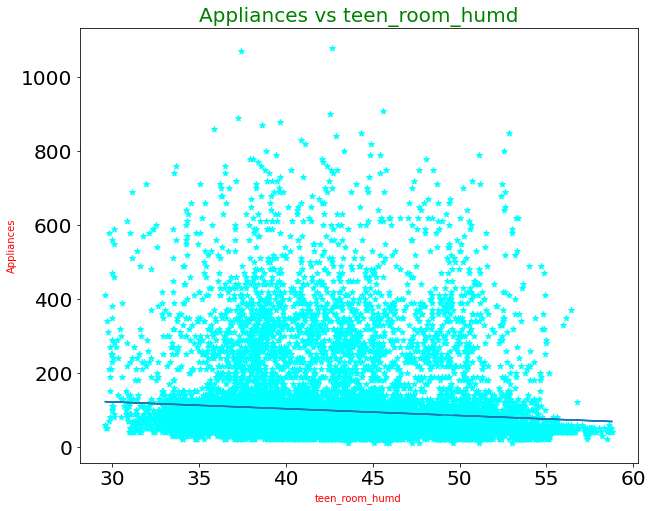

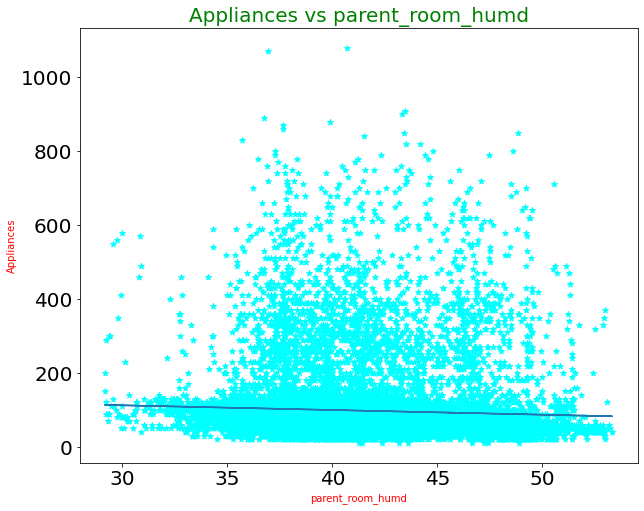

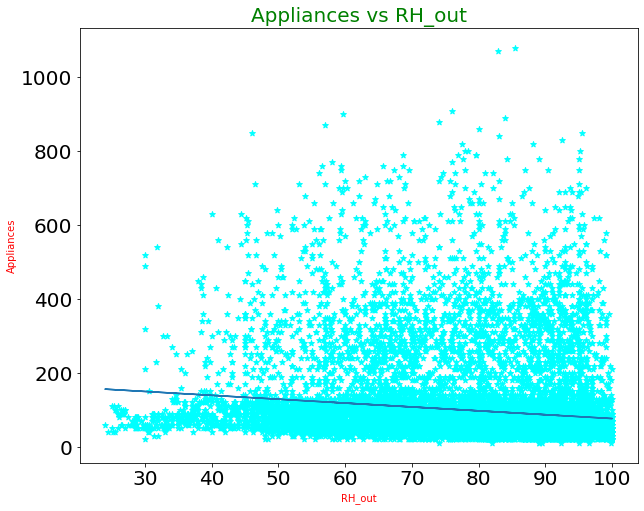

In [32]:
### Visualizing the dependent and independent variables(humidity) with linear model tools
from sklearn import linear_model
for elem in humidity_col:
    y = df_final2['Appliances']
    reg = linear_model.LinearRegression()
    reg.fit(df_final2[[elem]],y)
    plt.title(f'Appliances vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Appliances', color='red')
    plt.scatter(df_final2[elem],y, color='cyan', marker='*')
    plt.plot(df_final2[elem], reg.predict(df_final2[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

### Appliance use with other features(windspeed, visibility, Tdewpoint)

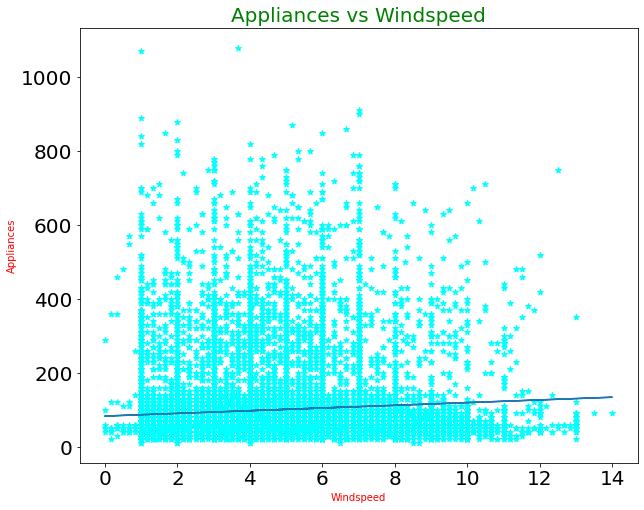

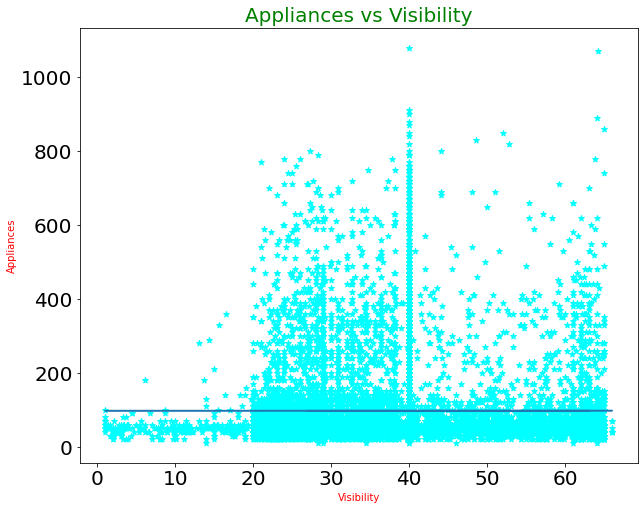

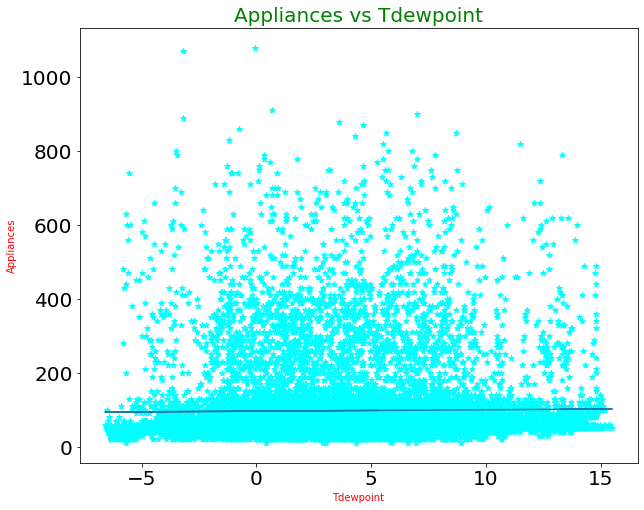

In [33]:
### Visualizing the dependent and independent variables(other features) with linear model tools
from sklearn import linear_model
for elem in other_phy_features:
    y = df_final['Appliances']
    reg = linear_model.LinearRegression()
    reg.fit(df_final[[elem]],y)
    plt.title(f'Appliances vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Appliances', color='red')
    plt.scatter(df_final[elem],y, color='cyan', marker='*')
    plt.plot(df_final[elem], reg.predict(df_final[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

### Appliance use with date and time

In [34]:
temporal_features.remove('Date')
temporal_features.remove('time')

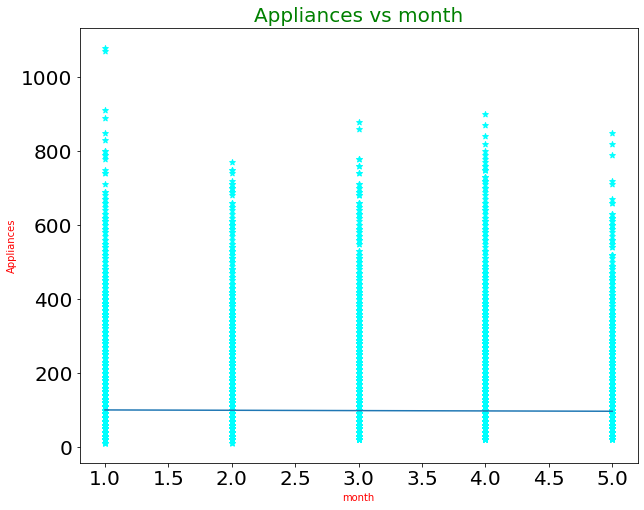

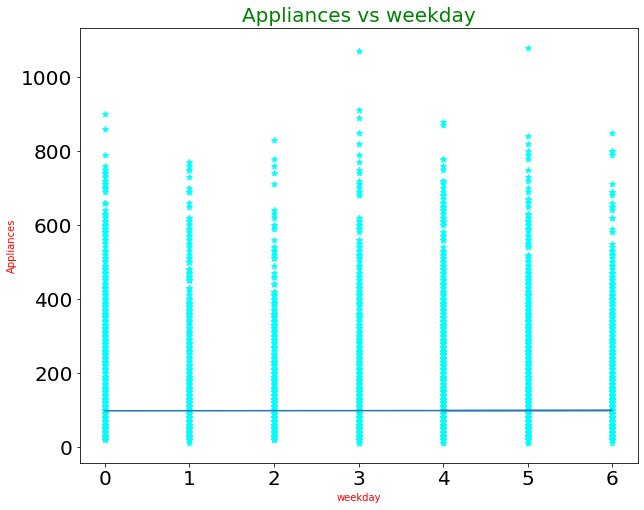

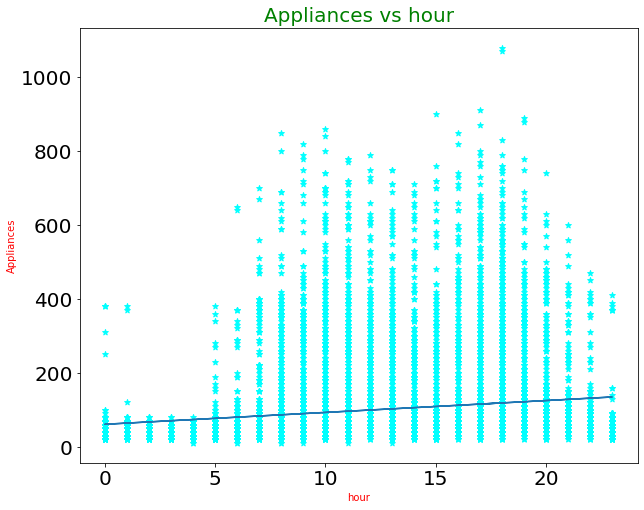

In [35]:
### Visualizing the dependent and independent variables(temporal features) with linear model tools
from sklearn import linear_model
for elem in temporal_features:
    y = df_final['Appliances']
    reg = linear_model.LinearRegression()
    reg.fit(df_final[[elem]],y)
    plt.title(f'Appliances vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Appliances', color='red')
    plt.scatter(df_final[elem],y, color='cyan', marker='*')
    plt.plot(df_final[elem], reg.predict(df_final[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

### Observations
1. Monthly: Highest energy use is in the month of January(Winter), while lowest energy use is in the month of june(Summers).
2. Daily: Highest energy use is in the evening(about 4:30 P.M. to 6:00 P.M.), while lowest energy use is during late night(1:00 A.M. to 4:00 P.M.).
3. Weekly: Thursday and Saturday has highest appliance use, while Tuesday has lowest appliance energy use.

### Energy Use in 6 phases of day

In [36]:
phase_list2 = ['df_erl_morn', 'df_morn', 'df_aft_noon', 'df_eve', 'df_nig', 'df_late_nig']
# Evening, night, late night, early morning, morning, afternoon
df_eve = df_final[(df_final['time']>='17:00:00') & (df_final['time']<'20:00:00')]
df_nig = df_final[(df_final['time']>='20:00:00') & (df_final['time']<'24:00:00')]
df_late_nig = df_final[(df_final['time']>='00:00:00') & (df_final['time']<'03:00:00')]
df_erl_morn = df_final[(df_final['time']>='03:00:00') & (df_final['time']<'07:00:00')]
df_morn = df_final[(df_final['time']>='07:00:00') & (df_final['time']<'11:00:00')]
df_aft_noon = df_final[(df_final['time']>='11:00:00') & (df_final['time']<'17:00:00')]

IndexError: ignored

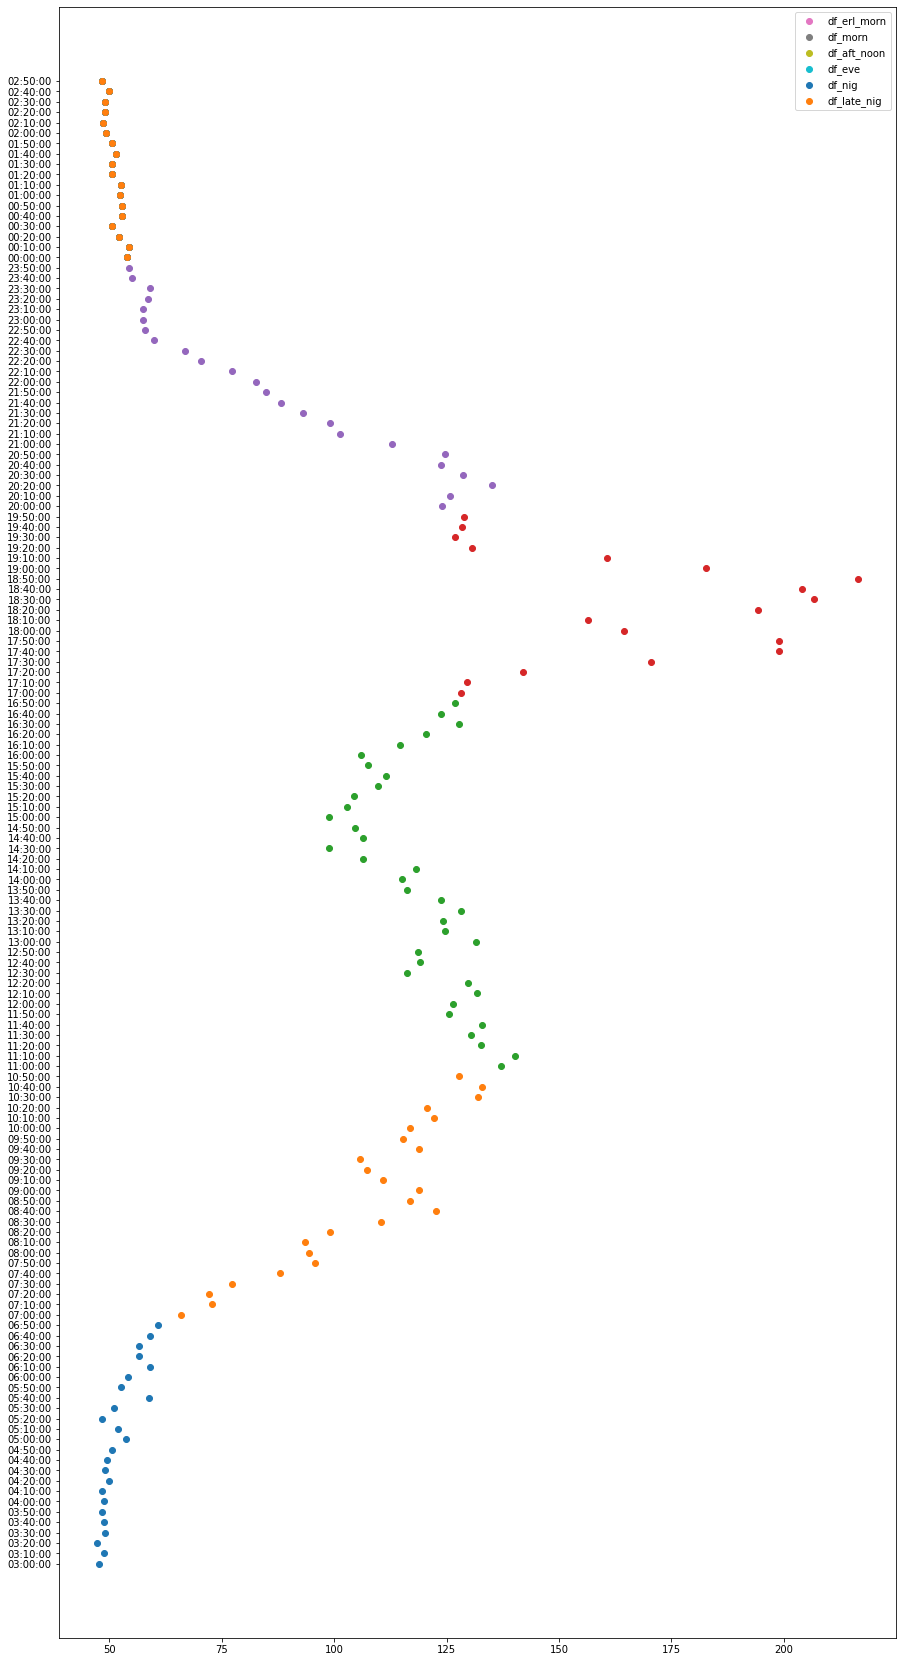

In [37]:
phase_list = [df_erl_morn, df_morn, df_aft_noon, df_eve, df_nig, df_late_nig]
for elem1 in phase_list:
    time_list = list(elem1.time.unique())
    mean_list = [(elem1[elem1['time']==elem2])['Appliances'].mean() for elem2 in time_list]
    phase_df = pd.DataFrame(time_list, mean_list, columns=['phase_time']).reset_index().rename(columns={'index':'Mean_Energy'}) 
    x = phase_df['Mean_Energy']
    y = phase_df['phase_time']
    plt.rcParams['figure.figsize'] = (15,30)
    plt.scatter(x,y)
    

phase_list2 = ['df_erl_morn', 'df_morn', 'df_aft_noon', 'df_eve', 'df_nig', 'df_late_nig']
n = 0
while n < 6: 
    result = phase_list2.pop(n)
    plt.scatter(x,y, label=result)
    plt.legend(loc = 'upper right')

# Step 5: Applying Machine Learing Algorithm to predict future energy requirements

# Processing the data before feeding it to ML models.

### Train-Test split

In [38]:
# splitting in dependent and independent variables
x = df_final2.drop(['Appliances'], axis=1)
y = df_final2[['Appliances']]

In [39]:
# perfoming train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=0)

### Scaling the data

In [40]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)
y_train_sc = scaler.fit_transform(y_train)
y_test_sc = scaler.transform(y_test)

### Linear Regression

In [41]:
model1 = linear_model.LinearRegression()
model1.fit(x_train_sc, y_train_sc)

LinearRegression()

In [42]:
y_pred1 = model1.predict(x_test_sc)

In [43]:
from sklearn import metrics 
print(metrics.mean_absolute_error(y_test_sc,y_pred1))

print(metrics.mean_squared_error(y_test_sc,y_pred1)) 

0.5517188138793756
0.9756895508731831


In [44]:
model1.score(x_test_sc, y_test_sc)

0.12262230295083842

Text(0, 0.5, 'predicted set')

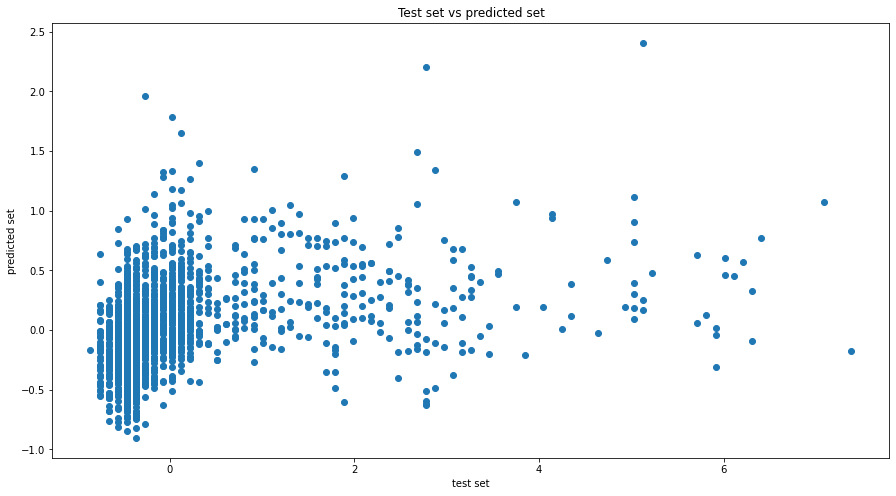

In [45]:
plt.rcParams['figure.figsize'] = (15,8)
plt.scatter(y_test_sc,y_pred1)
plt.title('Test set vs predicted set')
plt.xlabel('test set')
plt.ylabel('predicted set')

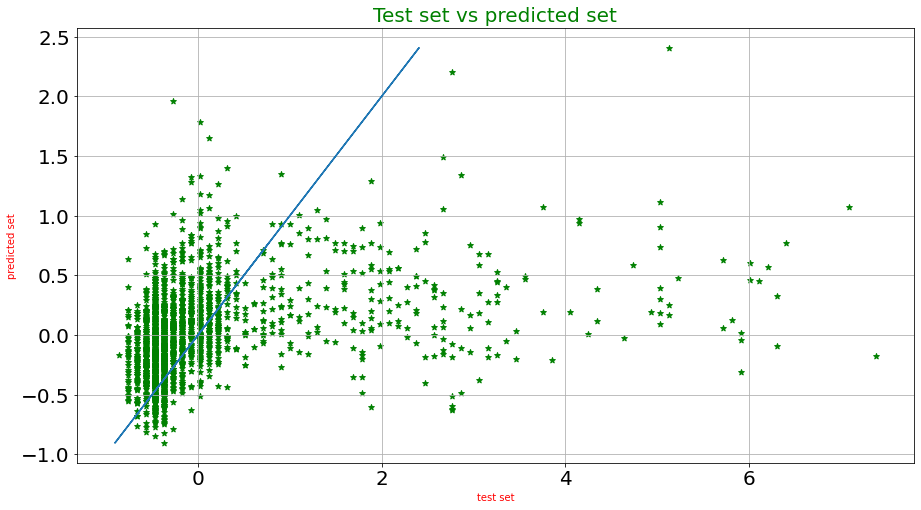

In [46]:
plt.title('Test set vs predicted set', fontsize=20, color='green')
plt.xlabel('test set', color='red')
plt.ylabel('predicted set', color='red')
plt.scatter(y_test_sc,y_pred1, color='green', marker='*')
plt.plot(y_pred1, model1.predict(x_test_sc))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.show()


### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [48]:
model2 = LogisticRegression()

In [49]:
scoring = ['accuracy']
scores = cross_validate(model2, x_train, y_train, scoring = scoring, cv = 3, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] START .....................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ................ accuracy: (train=0.234, test=0.232) total time=   9.7s
[CV] START .....................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.7s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ................ accuracy: (train=0.237, test=0.230) total time=   9.9s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.233, test=0.232) total time=  10.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.7s finished


In [50]:
scores['train_accuracy']

array([0.23369932, 0.23739549, 0.23283506])

In [51]:
scores['test_accuracy']

array([0.23222429, 0.23006757, 0.23192568])

In [52]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [53]:
from sklearn import metrics 
print(metrics.mean_absolute_error(y_test,y_pred2))

print(metrics.mean_squared_error(y_test,y_pred2)) 

50.33434650455927
13197.467071935158


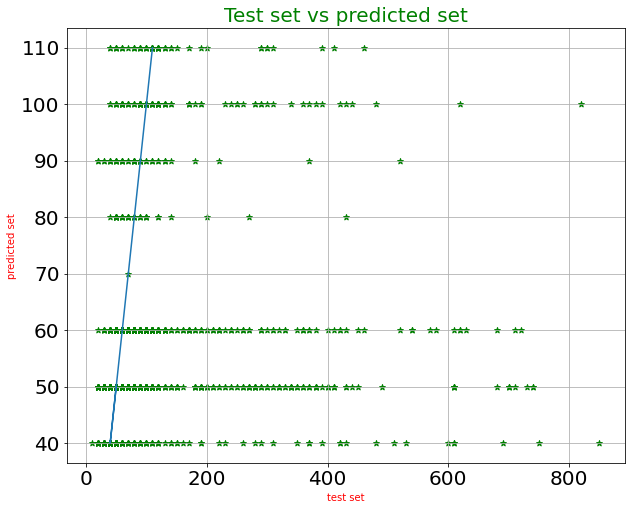

In [54]:
plt.title('Test set vs predicted set', fontsize=20, color='green')
plt.xlabel('test set', color='red')
plt.ylabel('predicted set', color='red')
plt.scatter(y_test,y_pred2, color='green', marker='*')
plt.plot(y_pred2, model2.predict(x_test))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.show()

### Decision Tree

In [55]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, auc
model3 = DecisionTreeRegressor()

In [56]:
model3.fit(x_train_sc, y_train_sc)

DecisionTreeRegressor()

### Measuring the performance

In [57]:
y_pred3 = model3.predict(x_test_sc)

In [58]:
from sklearn import metrics 
print(metrics.mean_absolute_error(y_test_sc,y_pred3))

print(metrics.mean_squared_error(y_test_sc,y_pred3)) 

0.35433916020684086
0.7703291474750193


In [59]:
model3.score(x_test_sc, y_test_sc)

0.3072903027642204

### Visualizing the predicted vs test value

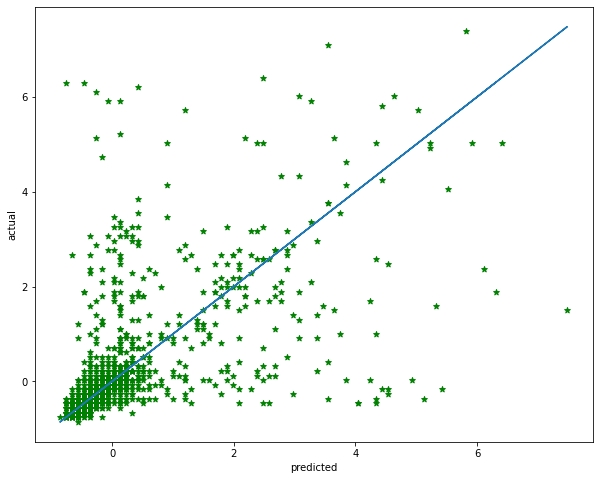

In [60]:
plt.xlabel('predicted')
plt.ylabel('actual')
plt.scatter(y_pred3, y_test_sc, color='green', marker='*')
plt.plot(y_pred3, model3.predict(x_test_sc))

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(criterion='mse', random_state=200)

In [62]:
model4.fit(x_train_sc, y_train_sc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', random_state=200)

In [63]:
y_pred4 = model4.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [64]:
from sklearn import metrics 
print(metrics.mean_absolute_error(y_test,y_pred4))

print(metrics.mean_squared_error(y_test,y_pred4)) 

99.47925635958372
21466.645353370957


In [65]:
model4.score(x_test_sc, y_test_sc)

0.5909973241953215

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


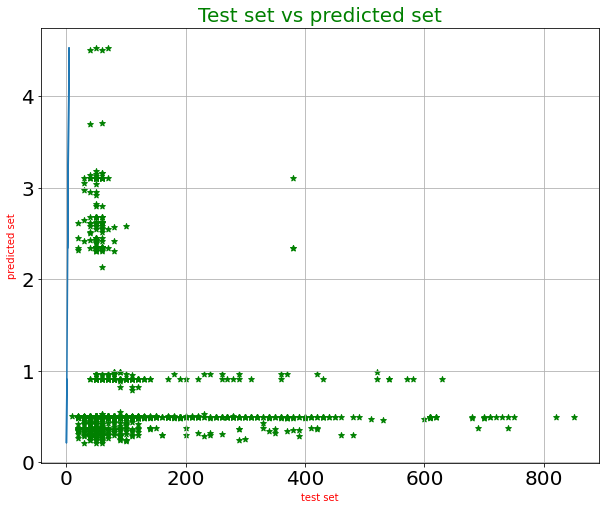

In [66]:
plt.title('Test set vs predicted set', fontsize=20, color='green')
plt.xlabel('test set', color='red')
plt.ylabel('predicted set', color='red')
plt.scatter(y_test,y_pred4, color='green', marker='*')
plt.plot(y_pred4, model4.predict(x_test))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.rcParams['figure.figsize'] = (10, 8)
plt.grid()
plt.show()

### Let's try some advanced methods and also compare them with traditional one

In [68]:
 from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


In [69]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['ElasticNet: ', ElasticNet(random_state=0)],
           ['DecisionTreeRegresson: ', DecisionTreeRegressor()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()],
           ['AdaBoostRegressor: ',AdaBoostRegressor()]
         ]

In [70]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(x_train_sc,y_train_sc)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train_sc,curr_model.predict(x_train_sc))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test_sc,curr_model.predict(x_test_sc))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test_sc,curr_model.predict(x_test_sc)))
    model_data.append(curr_model_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17:47:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
model_data

[{'Name': 'Lasso: ',
  'Test_R2_Score': -0.0006475176286202533,
  'Test_RMSE_Score': 1.0548800838429024,
  'Train_R2_Score': 0.0,
  'Train_Time': 0.019474029541015625},
 {'Name': 'Ridge: ',
  'Test_R2_Score': 0.12260171769501893,
  'Test_RMSE_Score': 0.987781576436006,
  'Train_R2_Score': 0.13797943113420608,
  'Train_Time': 0.014170408248901367},
 {'Name': 'ElasticNet: ',
  'Test_R2_Score': -0.0006475176286202533,
  'Test_RMSE_Score': 1.0548800838429024,
  'Train_R2_Score': 0.0,
  'Train_Time': 0.015427589416503906},
 {'Name': 'DecisionTreeRegresson: ',
  'Test_R2_Score': 0.2922131978253023,
  'Test_RMSE_Score': 0.8871841245994252,
  'Train_R2_Score': 1.0,
  'Train_Time': 0.41979193687438965},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.4762588918691555,
  'Test_RMSE_Score': 0.7631692498179639,
  'Train_R2_Score': 0.7153921927262741,
  'Train_Time': 0.03700065612792969},
 {'Name': 'SVR:',
  'Test_R2_Score': 0.1532383125749298,
  'Test_RMSE_Score': 0.9703828928042469,
  'Tr

In [72]:
result_df = pd.DataFrame(model_data)

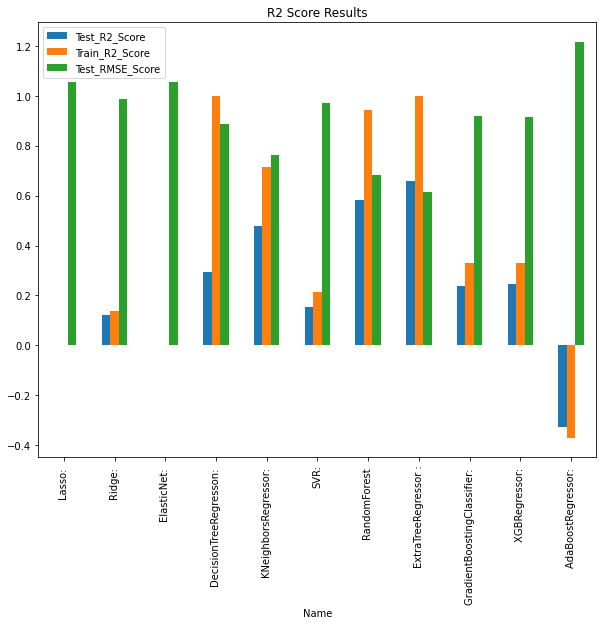

In [73]:
result_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

### Observations:
ExtraTreeClassifier and RandomForest models performed best with rmse near 0.6 and train-r2 score almost 1.

### Hyperparameter tuning

In [74]:
param_grid = [{
              'max_depth': [20, 50, 80,100],
              'n_estimators' : [50,70,100,120],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 3, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(x_train_sc, y_train_sc)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [20, 50, 80, 100],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [50, 70, 100, 120]}],
             scoring='r2', verbose=2)

In [75]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 120}

In [76]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=50, max_features='sqrt', n_estimators=120,
                    random_state=40)

In [77]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(x_train_sc,y_train_sc)

1.0

In [78]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(x_test_sc,y_test_sc)

0.673684452176225

In [79]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(y_test_sc, grid_search.best_estimator_.predict(x_test_sc)))

0.6023950787088839

Since the rmse value decreased. So, model is enhanced.


### Performing some predictions

In [80]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [81]:
score = reg.score(x_train, y_train)
score

0.9999999101850073

In [88]:
x_test.head()

,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Laundary_room_temp.,Office_room_temp,Outside_build_temp,T_out,Windspeed,hour,Liv_room_humidity,Outside_build_humd,iron_room_humd,teen_room_humd,parent_room_humd,RH_out
15563,21.20,33.290,19.823333,23.463333,20.50,10.263333,9.85,4.833333,18,31.790000,1.000000,24.290000,34.466667,29.230000,41.833333
12564,21.79,38.500,19.500000,22.500000,21.00,7.000000,6.90,4.000000,23,40.633333,40.333333,35.030000,37.526667,40.326667,75.000000
10649,22.39,41.390,20.200000,24.500000,20.10,11.030000,10.10,5.833333,15,43.790000,41.526667,34.156667,41.260000,42.060000,68.000000
16554,24.00,30.260,24.390000,23.390000,22.79,20.390000,19.10,4.000000,16,26.963333,1.000000,26.738571,34.480000,35.500000,31.000000
8130,20.05,38.245,17.600000,21.100000,19.89,0.133333,0.10,1.000000,4,41.000000,78.493333,36.000000,45.433333,38.863333,99.000000


In [91]:
reg.predict([[21.2, 33.29, 19.82, 23.46, 20.50, 10.26, 4.83, 3, 18, 31.79, 1.0, 24.29, 34.46, 29.23, 41.83]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([294.2])

### Conclusion:
This analysis shows that how much impact weather conditions have in our day-today energy consumption in home. Whenever the atomospheric pressure is low or high, there's a evident change in the way enegry is consumed. 
    

### Extra Analysis with Time Series Forcasting 

Time series forecasting is used when there is some kind of trend or seasonality in the data. Let's compare some of the popular statistical machine learning algorithms/modules for time series forecasting.

In [92]:
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
from sklearn.metrics import mean_squared_error

In [93]:
# Checking datetime format
print(df1['date'][0])
type(df1['date'][0])

2016-01-11 17:00:00


str

In [94]:
# Let's convert it to 
df1['date'] = pd.to_datetime(df1['date'])
type(df1['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [95]:
# Let's check the shape of data
df1.shape

(19735, 29)

In [96]:
print(df1['date'][0], list(df1['date'])[-1])

2016-01-11 17:00:00 2016-05-27 18:00:00


Each data point showing value for every 10 mins.
So, the dataset is huge consisting of 5 months of data. Let's first take one month of data.

In [97]:
data = df1[(df1['date']>='2016-01-01 00:00:00') & (df1['date']<='2016-01-31 23:59:59')]

In [98]:
data.shape

(2922, 29)

In [99]:
# Lets remove all columns other than timestamp and column of interest
data = data[['date','RH_1']]

# Rename date to timestamp and RH_1 to value
data = data.rename(columns={'date': 'timestamp', 'RH_1': 'value'})

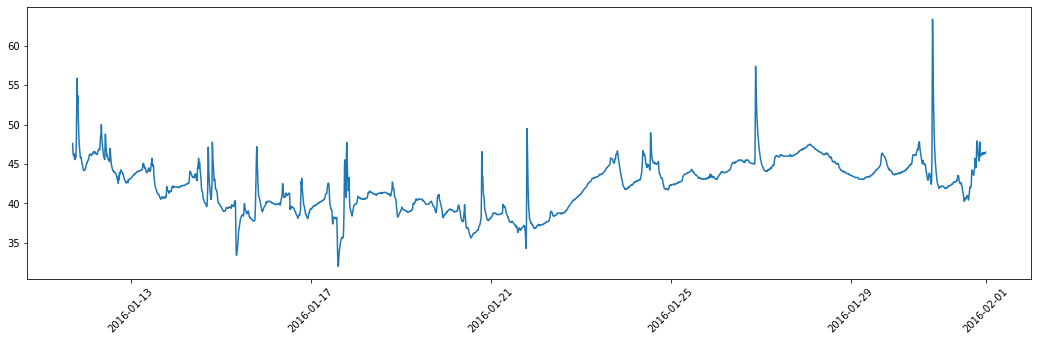

In [100]:
# Let's visualize the data
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(data['timestamp'], data['value'])
plt.xticks(rotation=45)
plt.show()

The dataset 'data' is showing high fluctuation. So, let's take datapoint for interval of an hour instead of 10 min.

In [101]:
# Resampling the dataset
data = data.set_index('timestamp')
data = data.resample("60T").mean()
data2 = data[~data['value'].isnull()]
print(f"Length after resampling: {len(data2)}")

Length after resampling: 487


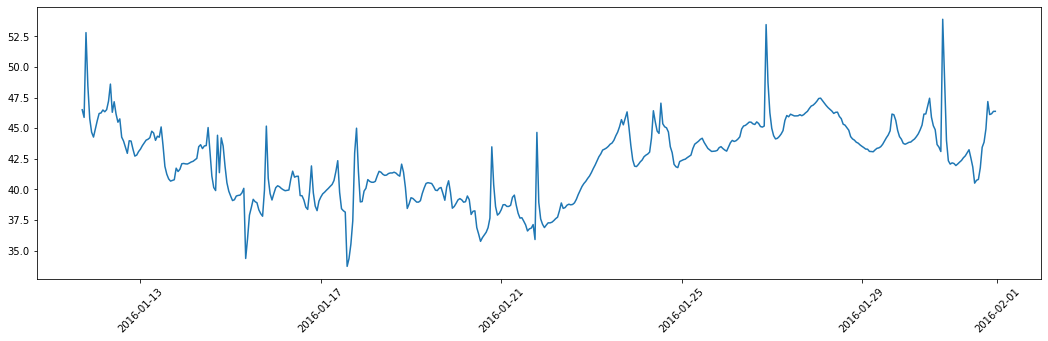

In [102]:
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(data2['value'])
plt.xticks(rotation=45)
plt.show()

### final dataset = data2

In [103]:
# train-test split
train_data = data2.head(500)
test_data = data2.tail(52)

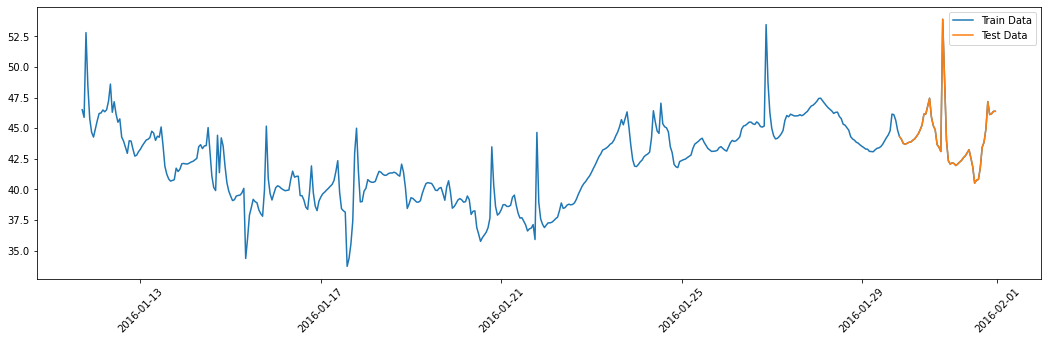

In [104]:
plt.rcParams['figure.figsize'] = (18,5)
plt.plot(train_data['value'], label='Train Data')
plt.plot(test_data['value'], label='Test Data')
plt.xticks(rotation=45)
plt.legend()
plt.show()

We have to forcast the orange line of the graph

### Let's first take a baseline model


In [105]:
# Constant variables
train_size = 500
forecast_horizon = 52

In [106]:
baseline_forecasts = forecast_horizon*[train_data['value'].mean()]
baseline_mse = mean_squared_error(test_data['value'].values, baseline_forecasts)

In [107]:
baseline_mse

8.618988039842476

## Stationary test

In [108]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [109]:
adfuller(train_data['value'].values)

(-2.421717004892248,
 0.13570052031154745,
 6,
 480,
 {'1%': -3.4440471158221206,
  '10%': -2.5699871918402777,
  '5%': -2.867580197120949},
 1532.8901461452936)

In [110]:
result = adfuller(train_data['value'].values)
print('ADF Statistic: %f' % result[0])

ADF Statistic: -2.421717


**The data is almost stationary. Higher negative values mean the data is more stationary.**

### Let's apply some more standardise models

# 1. ARIMA 

### Rescaling the data first

In [111]:
# Scaling. We will use standard scaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data['value'].values.reshape(-1, 1))

In [128]:
from statsmodels.tsa.arima.model import ARIMA

In [128]:
# Values for 'order' parameter are selected after hyper parameter tuning. These values give the lowest MSE of all the values 
# we tried.
model = ARIMA(scaled_train_data, order=(2,1,0))
model = model.fit()

In [128]:
# Forecast values for next 24 hours
forecasts = model.predict(start=scaled_train_data.size, end=scaled_train_data.size+forecast_horizon-1, dynamic=True)
forecasts = scaler.inverse_transform(forecasts.reshape(-1, 1))

### Plots 

In [128]:
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(train_data['value'], label='Train data')
plt.plot(test_data['value'], label='Test data')
plt.plot(test_data.index, forecasts, label='Forecasts')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plotting only a part of training data
plt.plot(train_data['value'].tail(38), label='Train data')
plt.plot(test_data['value'], label='Test data')
plt.plot(test_data.index, forecasts, label='Forecasts')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# 2. SARIMA

In [116]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [117]:
my_order = (2, 1, 0)
my_seasonal_order = (2, 1, 0, 5)

# define model
model = SARIMAX(scaled_train_data, order=my_order, seasonal_order=my_seasonal_order)

In [118]:
model_fit = model.fit(disp=0)

In [119]:
# Forecast total vaccinations for next 90 days
forecasts = model_fit.predict(start=scaled_train_data.size, end=scaled_train_data.size+forecast_horizon-1)
forecasts = scaler.inverse_transform(forecasts.reshape(-1, 1))

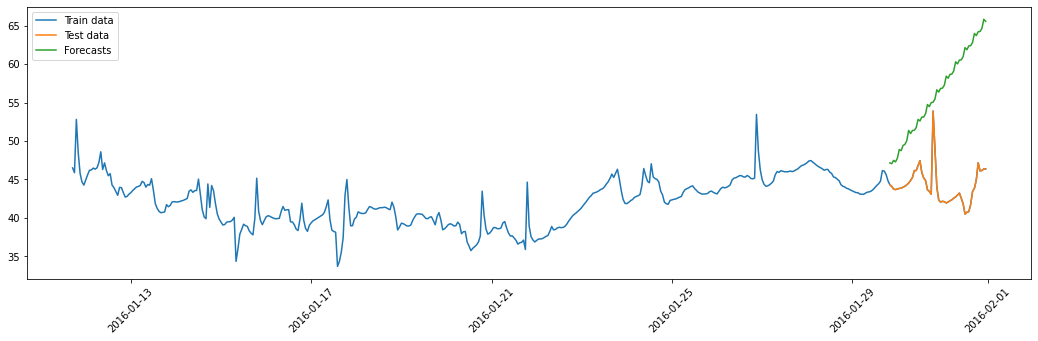

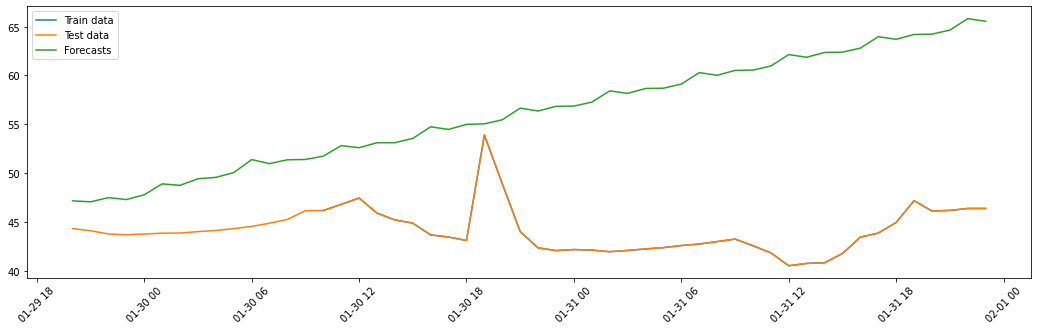

In [120]:
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(train_data['value'], label='Train data')
plt.plot(test_data['value'], label='Test data')
plt.plot(test_data.index, forecasts, label='Forecasts')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plotting only a part of training data
plt.plot(train_data['value'].tail(38), label='Train data')
plt.plot(test_data['value'], label='Test data')
plt.plot(test_data.index, forecasts, label='Forecasts')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [121]:
mse = mean_squared_error(test_data['value'].values, forecasts)
mse

185.6755300027979

### Problem Statement
1. Analyze the weather condition for the region and mention seasons with months.
2. Analyze the energy consumption w.r.t. humidity, temp., pressure, visibility one by one.
3. How much power supply will be needed for different phase of a normal day?
4. Which days of week will require more power supply?
5. How can electricity be saved by using optimal number of appliance and lights?

### Problem 1

In [126]:
p1 = df_final[['month','Outside_build_temp']]

In [127]:
p1_sorted = p1.sort_values('month', ascending=True)

In [128]:
mean_p1 = p1_sorted.groupby('month').min()
mean_p1

,Outside_build_temp
month,
1,-6.065
2,-5.712
3,-3.590
4,-1.000
5,1.290


### Observations:
Jan, Fab : 4 degree (Winter) \
Mar, Apr. : 7 to 8 degree \
May : 13 degree (Summer) \ 
Jun, July : 9 degree \
Aug, Sep : 10 degree \ 
Oct, Nov : 9 degree \
Dec. : 8 degree